In [1]:
using Flight.FlightCore.Systems
using Flight.FlightCore.Plotting

using Flight.FlightPhysics.Geodesy
using Flight.FlightPhysics.Kinematics

using Flight.FlightComponents.Aircraft

using Flight.FlightAircraft.C172R

using ControlSystems

In [2]:
ac = Cessna172Rv0(NED()) |> System #linearization requires NED kinematics
ac.u.airframe.pld.m_pilot = 75
ac.u.airframe.pld.m_copilot = 75
ac.u.airframe.pld.m_lpass = 0
ac.u.airframe.pld.m_rpass = 0
ac.u.airframe.pld.m_baggage = 0

trim_params = C172Rv0.TrimParameters(
    loc = LatLon(),
    h = HOrth(1000),
    ψ_nb = 0.0,
    TAS = 40.0,
    γ_wOb_n = 0.0,
    ψ_lb_dot = 0.00,
    θ_lb_dot = 0.0,
    β_a = 0.0,
    fuel = 1,
    mixture = 0.5,
    flaps = 0.0)

lm = Aircraft.linearize!(ac; trim_params)

Flight.FlightComponents.Control.LinearStateSpace{16, 4, 17, ComponentArrays.ComponentVector{Float64, Vector{Float64}, Tuple{ComponentArrays.Axis{(ψ = 1, θ = 2, φ = 3, ϕ = 4, λ = 5, h = 6, p = 7, q = 8, r = 9, v_x = 10, v_y = 11, v_z = 12, α_filt = 13, β_filt = 14, ω_eng = 15, fuel = 16)}}}, ComponentArrays.ComponentVector{Float64, Vector{Float64}, Tuple{ComponentArrays.Axis{(throttle = 1, aileron = 2, elevator = 3, rudder = 4)}}}, ComponentArrays.ComponentVector{Float64, Vector{Float64}, Tuple{ComponentArrays.Axis{(ψ = 1, θ = 2, φ = 3, ϕ = 4, λ = 5, h = 6, p = 7, q = 8, r = 9, TAS = 10, α = 11, β = 12, f_x = 13, f_y = 14, f_z = 15, ω_eng = 16, m_fuel = 17)}}}, ComponentArrays.ComponentMatrix{Float64, Matrix{Float64}, Tuple{ComponentArrays.Axis{(ψ = 1, θ = 2, φ = 3, ϕ = 4, λ = 5, h = 6, p = 7, q = 8, r = 9, v_x = 10, v_y = 11, v_z = 12, α_filt = 13, β_filt = 14, ω_eng = 15, fuel = 16)}, ComponentArrays.Axis{(ψ = 1, θ = 2, φ = 3, ϕ = 4, λ = 5, h = 6, p = 7, q = 8, r = 9, v_x = 10, v_y = 

## Lateral Dynamics

In [3]:
lat_dyn = filter(lm;
    u = (:aileron, :rudder),
    x = (:v_y, :φ, :p, :r, :β_filt),
    y = (:p, :r, :φ, :ψ, :β, :f_y))

lat_dyn_ss = lat_dyn |> ss
lat_dyn_tf = lat_dyn_ss |> tf

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}
Input 1 to output 1
    6.896650469354817s^4 + 351.0541087951662s^3 + 334.4056611062406s^2 + 1165.8194378851767s - 25.014943205567175
---------------------------------------------------------------------------------------------------------------------
1.0s^5 + 56.865975143087915s^4 + 353.5868367615613s^3 + 539.1664580485783s^2 + 1237.542488151249s - 29.06981819903537

Input 1 to output 2
     -0.1377460027156232s^4 - 8.655225526736444s^3 - 86.79816988490836s^2 + 85.493497069868s + 279.425696314048
---------------------------------------------------------------------------------------------------------------------
1.0s^5 + 56.865975143087915s^4 + 353.5868367615613s^3 + 539.1664580485783s^2 + 1237.542488151249s - 29.06981819903537

Input 1 to output 3
 -7.105427357601002e-15s^4 + 6.884318270499477s^3 + 350.27922199260615s^2 + 326.6348604324503s + 1173.4718525579203
-----------------------------------------------------

### Roll Dynamics

In [4]:
roll_dyn = filter(lat_dyn;
    u = (:aileron,),
    y = (:p,))

roll_dyn_ss = roll_dyn |> ss
roll_dyn_tf = roll_dyn_ss |> tf
@show zpk(roll_dyn_tf)

zpk(roll_dyn_tf) = TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
                            (1.0s + 50.00000000000006)(1.0s^2 + 0.9234405709851614s + 3.4019699001897488)(1.0s - 0.021323615070021767)
6.896650469354817---------------------------------------------------------------------------------------------------------------------------------
                 (1.0s + 49.99999999999998)(1.0s + 5.832926097119165)(1.0s^2 + 1.0562998705875262s + 4.28694071036619)(1.0s - 0.02325082461877868)

Continuous-time transfer function model


TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
                            (1.0s + 50.00000000000006)(1.0s^2 + 0.9234405709851614s + 3.4019699001897488)(1.0s - 0.021323615070021767)
6.896650469354817---------------------------------------------------------------------------------------------------------------------------------
                 (1.0s + 49.99999999999998)(1.0s + 5.832926097119165)(1.0s^2 + 1.0562998705875262s + 4.28694071036619)(1.0s - 0.02325082461877868)

Continuous-time transfer function model

zpk(a2p) = TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
                               1.0s^2 + 0.9234405709851613s + 3.4019699001897488
6.896650469354817------------------------------------------------------------------------------
                 (1.0s + 5.8329260971191665)(1.0s^2 + 1.0562998705875257s + 4.2869407103661885)

Continuous-time transfer function model
poles(err_a2p) = ComplexF64[-12.765954532292879 + 0.0im, -0.5099609523843167 + 1.880576986853554im, -0.5099609523843167 - 1.880576986853554im]
err_a2p(0) = [0.5159200255156224;;]


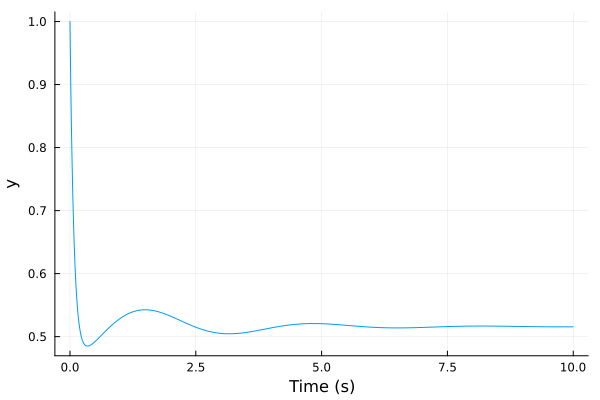

In [42]:
#there is a natural pole-zero near-cancellations. it is in the right half plane,
#but its time constant is extremely slow. since they are natural (not achieved
#through compensation), we can probably simplify them. they likely represent
#nearly uncontrollable states, because the pole is insensitive to feedforward
#compensation. this pole-zero pair disappears when v_y is omitted from the
#lateral dynamics, so it may represent the intuitive notion that v_y is not
#really controllable in a conventional aircraft! it is not mathematical, exact
#uncontrollability (which would result in exact pole-zero cancellation), but
#practical uncontrollability
a2p = minreal(roll_dyn_tf, 1e-2) 
@show zpk(a2p)

#output error transfer function for a unit feedback closed loop
err_a2p = 1/(1+a2p)
#ensure there are no unstable poles in the closed loop system so we can apply the final value theorem
@show poles(err_a2p)

#steady state error of the closed loop system for a unit step input
@show err_a2p(0)
step(err_a2p, 10) |> plot


zpk(err_c_a2p) = TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
            (1.0s + 20.000000000000014)(1.0s + 5.83292609711916)(1.0s^2 + 1.0562998705875253s + 4.286940710366193)(1.0s)
1.0-------------------------------------------------------------------------------------------------------------------------------
   (1.0s + 29.080527620101286)(1.0s^2 + 7.166012949902779s + 48.17883032949669)(1.0s^2 + 0.9876611017348318s + 3.3491927654940494)

Continuous-time transfer function model


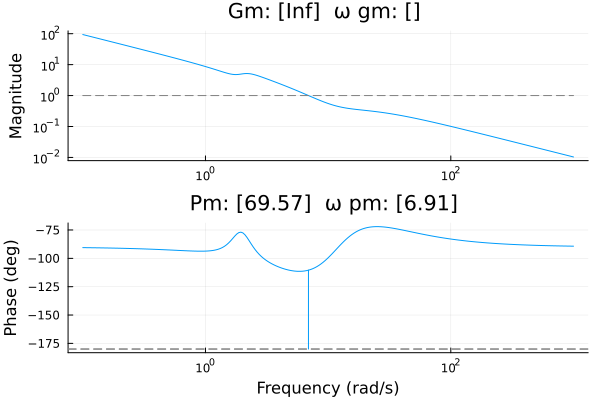

In [6]:
#define a PID compensator
k_p = 0.5
k_i = 10
k_d = 0.05
τ_d = 0.05
p_cmp = k_p + k_i * tf(1, [1,0]) + k_d * tf([1, 0], [τ_d, 1])
    
c_a2p = series(p_cmp, a2p)
err_c_a2p = 1/(1+c_a2p)
@show zpk(err_c_a2p);
marginplot(c_a2p)
# nyquistplot(c_a2p)

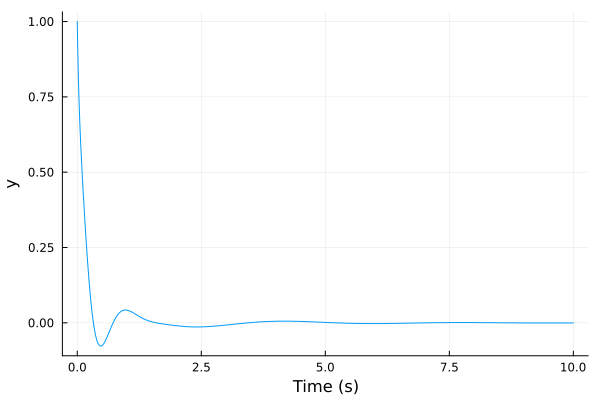

In [7]:
step(err_c_a2p, 10) |> plot

Let's check the response we get from the full plant, without the zero-pole simplification

In [8]:
c_roll_dyn = series(p_cmp, roll_dyn_tf)

err_c_roll_dyn = 1/(1+c_roll_dyn)
@show zpk(err_c_roll_dyn)
# @show err_c_yaw_dyn(0)

# marginplot(c_yaw_dyn)

zpk(err_c_roll_dyn) = TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
           (1.0s + 50.00000000000004)(1.0s + 20.000000000000004)(1.0s + 5.832926097119176)(1.0s^2 + 1.056299870587525s + 4.2869407103661965)(1.0s - 0.023250824618778688)(1.0s)
1.0------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   (1.0s + 50.000000000000014)(1.0s + 29.07993533069983)(1.0s^2 + 7.164701235792133s + 48.17224476036908)(1.0s^2 + 0.9876422753018352s + 3.349031004975369)(1.0s - 0.02132799467363745)

Continuous-time transfer function model


TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
           (1.0s + 50.00000000000004)(1.0s + 20.000000000000004)(1.0s + 5.832926097119176)(1.0s^2 + 1.056299870587525s + 4.2869407103661965)(1.0s - 0.023250824618778688)(1.0s)
1.0------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   (1.0s + 50.000000000000014)(1.0s + 29.07993533069983)(1.0s^2 + 7.164701235792133s + 48.17224476036908)(1.0s^2 + 0.9876422753018352s + 3.349031004975369)(1.0s - 0.02132799467363745)

Continuous-time transfer function model

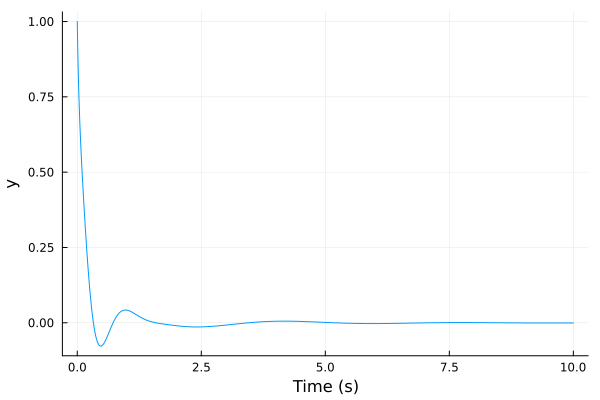

In [9]:
step(err_c_roll_dyn, 10) |> plot

Now we have a SISO compensator design for p, let's use it to close the loop in the MIMO plant and make sure we get the expected response. The lat_dyn MIMO system has two inputs, aileron input u_a and rudder input u_r. Our SISO compensator receives p_err as an input and outputs u_a. So the MIMO version of our SISO compensator, which will be placed upstream of the MIMO plant, must receive p_err and u_r as inputs and output u_a and u_r. Therefore, it must apply the SISO compensator to p_err to obtain u_a and let u_r pass through unchanged to the plant by applying an unit gain to it. This is achieved as follows:

In [10]:
#create a diagonal MIMO system from the roll rate compensator and a unit
#transfer function
p_cmp_MIMO = append(p_cmp, tf(1)) |> ss #and convert to ss before concatenation

StateSpace{Continuous, Float64}
A = 
 0.0    8.0
 0.0  -20.0
B = 
 0.0  0.0
 4.0  0.0
C = 
 6.25  -2.500000000000001
 0.0    0.0
D = 
 1.5000000000000002  0.0
 0.0                 1.0

Continuous-time state-space model

In [11]:
p_cmp_lat_dyn = series(p_cmp_MIMO, lat_dyn_ss) #equivalent to long_dyn_ss * q_comp_MIMO (in the product notation, the second system goes first)

StateSpace{Continuous, Float64}
A = 
 -0.28937477191398386     9.738211635656015       0.06497206643787479  -37.97113287819764      0.0               24.381033642826644    -9.752413457130661
 -1.5738726378210055e-7  -3.782642074487002e-9    1.0                    0.0895240845444211    0.0                0.0                   0.0
 -0.24216681666680473    -1.7632334845640862e-5  -5.7808707834752155     2.3036297870595384    0.0               43.10406543346762    -17.241626173387054
  0.08804730919718096     4.9722036954413795e-6  -0.18490756354486712   -0.7957295839160752    0.0               -0.8609125169725907    0.3443650067890364
  1.25                    0.0                     0.0                    0.0                 -49.99999999999999   0.0                   0.0
  0.0                     0.0                     0.0                    0.0                   0.0                0.0                   8.0
  0.0                     0.0                     0.0                    0.0    

The setpoint vector to be applied to the complete closed-loop MIMO system is r = [p_cmd, u_r]. The input to the MIMO compensator must be e = [p_err, u_r] = r - f = [p_cmd, u_r] - [p, 0]. So the feedback vector we need is f = [p, 0]. To construct this from the 6-output vector of lat_dyn, we need a matrix gain that premultiplies this output vector and produces a 2-component vector [p, 0]. This will be a 2x6 matrix with all entries set to zero except [1, 1] (the nonzero output p goes in the first component, and p is the first element in lat_dyn's output vector)

zpk(p_cl_MIMO) = TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
                             (1.0s + 50.000000000000085)(1.0s^2 + 13.333333333333321s + 133.33333333333337)(1.0s^2 + 0.9234405709851614s + 3.4019699001897505)(1.0s - 0.021323615070022825)
10.344975704032223-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                  (1.0s + 50.00000000000007)(1.0s + 29.07993533069985)(1.0s^2 + 7.164701235792132s + 48.172244760369004)(1.0s^2 + 0.987642275301837s + 3.3490310049753695)(1.0s - 0.021327994673636205)

Continuous-time transfer function model


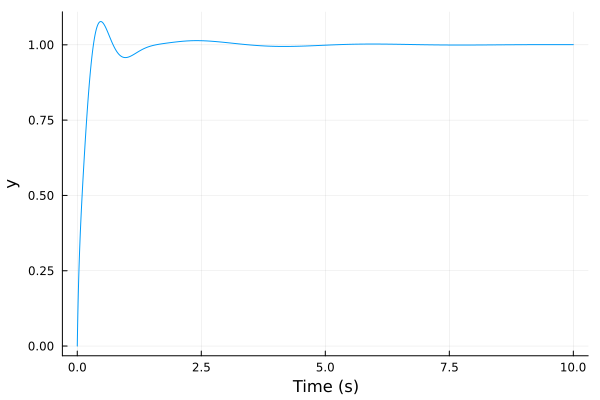

In [12]:
K_p = zeros(2, 6)
K_p[1,1] = 1
K_p_ss = ss(K_p) #creates a ss with no dynamics and K_select as feedthrough

#now create a feedback loop with K in the feedback path
p_cmp_lat_dyn_cl = feedback(p_cmp_lat_dyn, K_p_ss)

#now extract the resulting closed-loop roll demand to roll rate transfer function 
p_cl_MIMO = (p_cmp_lat_dyn_cl |> tf)[1,1]

#make sure the zpk data matches that of the SISO closed loop TF
@show zpk(p_cl_MIMO)

#check step response
step(p_cl_MIMO, 10) |> plot


### Turn Coordination

Now we focus on turn coordination. The plan is to design a SISO turn coordinator, ignoring the roll - yaw coupling for the moment. The result will be a SISO compensator with β_err as input and u_r as output. We embed it in a MIMO compensator that applies the SISO compensator to β_err and lets u_a pass through unchanged, and connect it upstream of the lateral dynamics plant. The result is then a plant with β_dmd and u_a as inputs.

In [13]:
yaw_dyn = filter(lat_dyn;
    u = (:rudder,),
    y = (:β,))

yaw_dyn_ss = yaw_dyn |> ss
yaw_dyn_tf = yaw_dyn_ss |> tf
@show zpk(yaw_dyn_tf)

zpk(yaw_dyn_tf) = TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
                                (1.0s + 50.000000000069804)(1.0s + 25.09899319792329)(1.0s + 6.32697346814713)(1.0s - 0.08784551081369543)
-0.028459616487204187---------------------------------------------------------------------------------------------------------------------------------
                     (1.0s + 49.99999999999998)(1.0s + 5.832926097119165)(1.0s^2 + 1.0562998705875262s + 4.28694071036619)(1.0s - 0.02325082461877868)

Continuous-time transfer function model


TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
                                (1.0s + 50.000000000069804)(1.0s + 25.09899319792329)(1.0s + 6.32697346814713)(1.0s - 0.08784551081369543)
-0.028459616487204187---------------------------------------------------------------------------------------------------------------------------------
                     (1.0s + 49.99999999999998)(1.0s + 5.832926097119165)(1.0s^2 + 1.0562998705875262s + 4.28694071036619)(1.0s - 0.02325082461877868)

Continuous-time transfer function model

zpk(r2β) = TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
                                 (1.0s + 25.098993197923292)(1.0s + 6.326973468147129)
-0.028459616487204187------------------------------------------------------------------------------
                     (1.0s + 5.8329260971191665)(1.0s^2 + 1.0562998705875257s + 4.2869407103661885)

Continuous-time transfer function model
zpk(c1_r2β) = TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
                                (1.0s + 25.098993197923292)(1.0s + 6.326973468147129)
0.028459616487204187------------------------------------------------------------------------------
                    (1.0s + 5.8329260971191665)(1.0s^2 + 1.0562998705875257s + 4.2869407103661885)

Continuous-time transfer function model
zpk(err_c1_r2β) = TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
   (1.0s + 5.8329260971191665)(1.0s^2 + 1.0562998705875257s + 4.286940

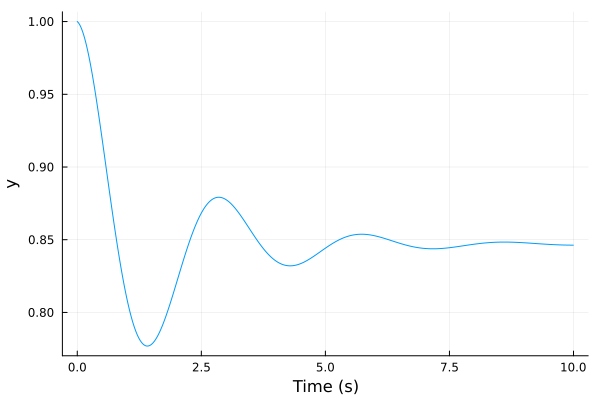

In [40]:
#get rid of natural zero-pole near-cancellation
r2β = minreal(yaw_dyn_tf, 1e-1)
@show zpk(r2β)

#the first thing we notice is that the DC gain is negative. this makes sense,
#given that we have: act.rudder↑ -> aero.r↓ -> yaw↑ -> β↓. therefore, the first
#thing we need in the forward path is a sign change.
c1 = tf(-1)
c1_r2β = series(c1, r2β)
@show zpk(c1_r2β)

#output error transfer function for a unit feedback closed loop
err_c1_r2β = 1/(1+c1_r2β)
#ensure there are no unstable poles in the closed loop system so we can apply the final value theorem
@show zpk(err_c1_r2β)

@show err_c1_r2β(0)
step(err_c1_r2β, 10) |> plot
#this is type 0 system, so we will need an integrator in the feedforward path


err_c_r2β(0) = [0.0;;]


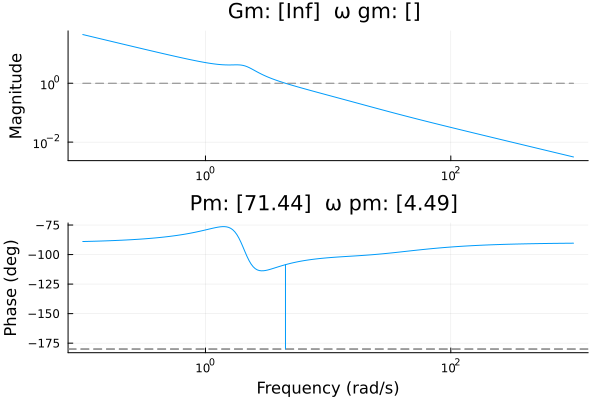

In [15]:
#define a PID
k_p = 10
k_i = 25
k_d = 5
τ_d = 0.05
c2 = k_p + k_i * tf(1, [1,0]) + k_d * tf([1, 0], [τ_d, 1])

#the compensator is the PID chained with the sign inversion
β_cmp = series(c1, c2)
    
c_r2β = series(β_cmp, r2β)

err_c_r2β = 1/(1+c_r2β)
# @show zpk(err_c2_c1_r2β)
@show err_c_r2β(0)

marginplot(c_r2β)

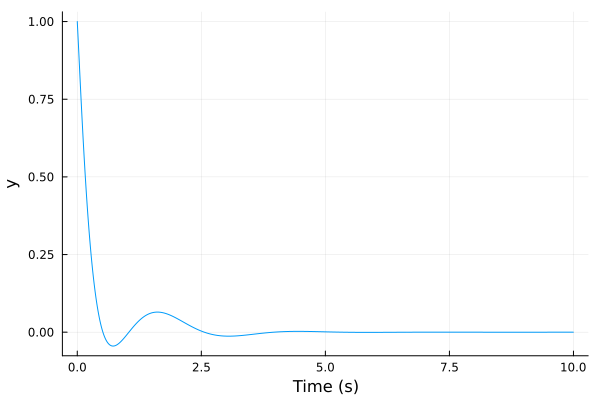

In [16]:
step(err_c_r2β, 10) |> plot

Let's check the response we get from the full plant, without the zero-pole simplification

In [17]:
c_yaw_dyn = series(β_cmp, yaw_dyn_tf)

err_c_yaw_dyn = 1/(1+c_yaw_dyn)
@show zpk(err_c_yaw_dyn)
# @show err_c_yaw_dyn(0)

# marginplot(c_yaw_dyn)

zpk(err_c_yaw_dyn) = TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
          (1.0s + 50.00000000000004)(1.0s + 20.000000000000004)(1.0s + 5.832926097119176)(1.0s^2 + 1.056299870587525s + 4.2869407103661965)(1.0s - 0.023250824618778688)(1.0s)
1.0----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   (1.0s + 49.99999999999639)(1.0s + 19.10109854054557)(1.0s^2 + 8.76117787640822s + 19.27268092874669)(1.0s^2 + 2.2209043907436388s + 6.223184285424808)(1.0s - 0.08664785101334613)

Continuous-time transfer function model


TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
          (1.0s + 50.00000000000004)(1.0s + 20.000000000000004)(1.0s + 5.832926097119176)(1.0s^2 + 1.056299870587525s + 4.2869407103661965)(1.0s - 0.023250824618778688)(1.0s)
1.0----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   (1.0s + 49.99999999999639)(1.0s + 19.10109854054557)(1.0s^2 + 8.76117787640822s + 19.27268092874669)(1.0s^2 + 2.2209043907436388s + 6.223184285424808)(1.0s - 0.08664785101334613)

Continuous-time transfer function model

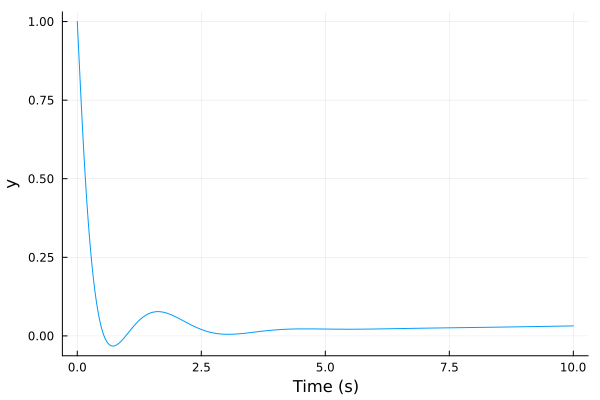

In [18]:
step(err_c_yaw_dyn, 10) |> plot

As expected, it is quite similar, except for a slowly creeping divergence due to the slow unstable pole, which we haven't dealt with and is less exactly cancelled than in the roll dynamics.

Now we have a SISO compensator design for $\beta$, let's use it to close the loop in the MIMO plant and make sure we get the expected response. The lat_dyn MIMO system has two inputs, aileron input u_a and rudder input u_r. Our SISO compensator receives $e_{\beta}$ as an input and outputs u_r. So the MIMO version of our SISO compensator, which will be placed upstream of the MIMO plant, must receive u_a and beta_err as inputs and output u_a and u_r. Therefore, it must let u_a pass through unchanged to the plant by applying an unit gain to it, and apply the SISO compensator to beta_err to obtain u_r. This is achieved as follows:

In [19]:
#create a diagonal MIMO system from a unit TF and the beta compensator
β_cmp_MIMO = append(tf(1), β_cmp) |> ss #and convert to ss before concatenation

StateSpace{Continuous, Float64}
A = 
 0.0    4.0
 0.0  -20.0
B = 
 0.0  0.0
 0.0  8.0
C = 
   0.0      0.0
 -15.625  246.875
D = 
 1.0     0.0
 0.0  -110.0

Continuous-time state-space model

In [20]:
β_cmp_lat_dyn = series(β_cmp_MIMO, lat_dyn_ss) #equivalent to long_dyn_ss * q_comp_MIMO (in the product notation, the second system goes first)

StateSpace{Continuous, Float64}
A = 
 -0.28937477191398386     9.738211635656015       0.06497206643787479  -37.97113287819764      0.0                17.787260304513495  -281.03871281131325
 -1.5738726378210055e-7  -3.782642074487002e-9    1.0                    0.0895240845444211    0.0                 0.0                   0.0
 -0.24216681666680473    -1.7632334845640862e-5  -5.7808707834752155     2.3036297870595384    0.0                 9.23819034631639   -145.96340747179897
  0.08804730919718096     4.9722036954413795e-6  -0.18490756354486712   -0.7957295839160752    0.0               -11.583520376292514   183.01962194542173
  1.25                    0.0                     0.0                    0.0                 -49.99999999999999    0.0                   0.0
  0.0                     0.0                     0.0                    0.0                   0.0                 0.0                   4.0
  0.0                     0.0                     0.0                    0.0  

The setpoint vector to be applied to the complete closed-loop MIMO system is r = [u_a, beta_cmd]. The input to the MIMO compensator must be e = [u_a, beta_err] = r - f = [u_a, beta_cmd] - [0, beta]. So the feedback vector we need is f = [0, beta]. To construct this from the 6-output vector of lat_dyn, we need a matrix gain that premultiplies this output vector and produces a 2-component vector [0, beta]. This will be a 2x6 matrix with all entries set to zero except [2, 5] (the nonzero output beta goes in the second output component, and beta is the 5th element in lat_dyn's output vector)

zpk(β_cl_MIMO) = TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
                              (1.0s + 25.098993197943564)(1.0s + 6.326973468146947)(1.0s^2 + 2.045454545454548s + 4.545454545454554)(1.0s - 0.08784551081369796)
3.1305578135943755----------------------------------------------------------------------------------------------------------------------------------------------------------
                  (1.0s + 19.10109854054359)(1.0s^2 + 8.761177876408382s + 19.272680928747224)(1.0s^2 + 2.2209043907436308s + 6.223184285424773)(1.0s - 0.08664785101334985)

Continuous-time transfer function model


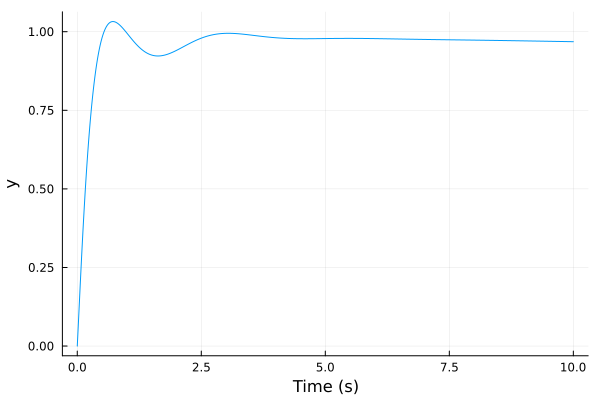

In [31]:
K_β = zeros(2, 6)
K_β[2,5] = 1
K_β_ss = ss(K_β) #creates a ss with no dynamics and K_select as feedthrough

#now create a feedback loop with K in the feedback path
β_cmp_lat_dyn_cl = feedback(β_cmp_lat_dyn, K_β_ss)

#now extract the resulting closed-loop beta demand to beta transfer function 
β_cl_MIMO = β_cmp_lat_dyn_cl[5,2]

#make sure the zpk data matches that of the SISO closed loop TF
@show zpk(β_cl_MIMO)

#check step response
step(β_cl_MIMO, 10) |> plot


### Roll control and turn coordination

In [22]:
#create a diagonal MIMO system from both compensators
pβ_cmp_MIMO = append(p_cmp, β_cmp) |> ss #and convert to ss before concatenation

StateSpace{Continuous, Float64}
A = 
 0.0    8.0  0.0    0.0
 0.0  -20.0  0.0    0.0
 0.0    0.0  0.0    4.0
 0.0    0.0  0.0  -20.0
B = 
 0.0   0.0
 4.0   0.0
 0.0   0.0
 0.0  32.0
C = 
 6.25  -2.500000000000001   0.0       0.0
 0.0    0.0                -3.90625  61.71875
D = 
 1.5000000000000002     0.0
 0.0                 -110.0

Continuous-time state-space model

In [23]:
pβ_cmp_lat_dyn = series(pβ_cmp_MIMO, lat_dyn_ss) #equivalent to long_dyn_ss * q_comp_MIMO (in the product notation, the second system goes first)

StateSpace{Continuous, Float64}
A = 
 -0.28937477191398386     9.738211635656015       0.06497206643787479  -37.97113287819764      0.0               24.381033642826644    -9.752413457130661    4.446815076128374   -70.25967820282831
 -1.5738726378210055e-7  -3.782642074487002e-9    1.0                    0.0895240845444211    0.0                0.0                   0.0                  0.0                   0.0
 -0.24216681666680473    -1.7632334845640862e-5  -5.7808707834752155     2.3036297870595384    0.0               43.10406543346762    -17.241626173387054    2.3095475865790975  -36.49085186794974
  0.08804730919718096     4.9722036954413795e-6  -0.18490756354486712   -0.7957295839160752    0.0               -0.8609125169725907    0.3443650067890364  -2.8958800940731284   45.75490548635543
  1.25                    0.0                     0.0                    0.0                 -49.99999999999999   0.0                   0.0                  0.0                   0.0
  0.0    

In [30]:
K_pβ = zeros(2, 6)
K_pβ[1,1] = 1 #assigns p to the first component
K_pβ[2,5] = 1 #assigns β to the second component
K_pβ_ss = ss(K_pβ) #creates a ss with no dynamics and K_pβ as feedthrough; this selects p and β as our feedback vector

#now create a feedback loop with K in the feedback path
pβ_cmp_lat_dyn_cl = feedback(pβ_cmp_lat_dyn, K_pβ_ss)

#now extract the resulting closed-loop SISO transfer functions from the MIMO system
p_cl_MIMO = pβ_cmp_lat_dyn_cl[1,1] #input 1 to output 1
β_cl_MIMO = pβ_cmp_lat_dyn_cl[5,2] #input 2 to output 5

#check that the zpk data matches that of the SISO closed loop TF
@show zpk(p_cl_MIMO)
@show zpk(β_cl_MIMO)

StateSpace{Continuous, Float64}
A = 
 -3.4199325855083593      9.738211635656015       -5.786476007840521   -37.97113287819764      0.0               24.381033642826644    -9.752413457130661    4.446815076128374   -70.25967820282831
 -1.5738726378210055e-7  -3.782642074487002e-9     1.0                   0.0895240845444211    0.0                0.0                   0.0                  0.0                   0.0
 -1.8680883176184895     -1.7632334845640862e-5  -16.125846487507445     2.3036297870595384    0.0               43.10406543346762    -17.241626173387054    2.3095475865790975  -36.49085186794974
  2.126746895424664       4.9722036954413795e-6    0.0217114405285547   -0.7957295839160752    0.0               -0.8609125169725907    0.3443650067890364  -2.8958800940731284   45.75490548635543
  1.25                    0.0                      0.0                   0.0                 -49.99999999999999   0.0                   0.0                  0.0                   0.0
  0.0    

From the closed loop transfer functions, we see that with both controllers are implemented and operating in parallel as a MIMO compensator, the slow unstable pole is nearly perfectly cancelled in the full lateral dynamics!

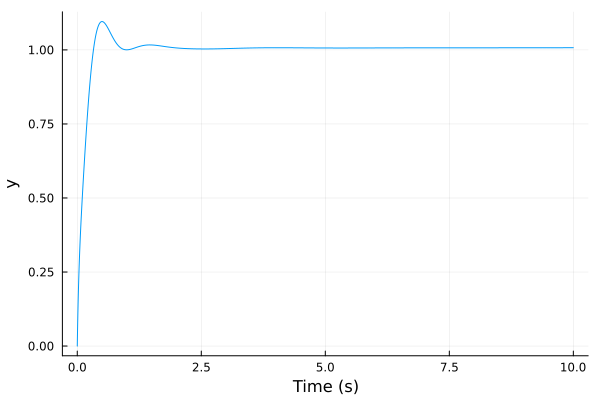

In [28]:
#check roll rate demand step response
step(p_cl_MIMO, 10) |> plot

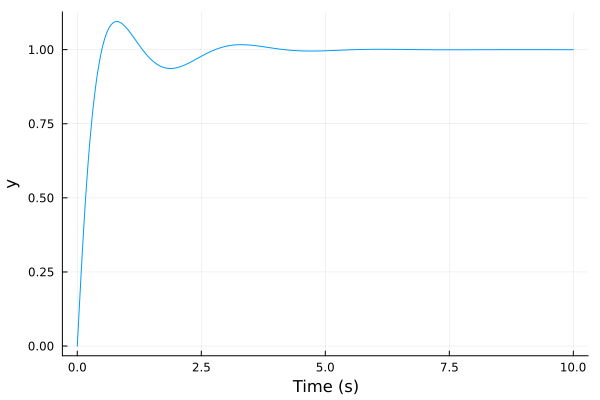

In [29]:
#check β demand step response
step(β_cl_MIMO, 10) |> plot

### Bank angle control

We start from the closed-loop lateral dynamics augmented with roll rate control and turn compensation. This is a MIMO
system with inputs $p$ and $\beta$, and the same outputs $p, r, \phi, \psi, \beta, f_y$ as the original open-loop
system. We are interested in the response from input 1 to output 3. This will be our open loop SISO system:

zpk(p2φ) = TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
                                            (1.0s + 49.999999999996675)(1.0s + 17.928582917636042)(1.0s^2 + 13.33333333333336s + 133.33333333333314)(1.0s + 3.3672214131778264)(1.0s^2 + 1.897595243143113s + 6.108961026877575)
10.326477405749756-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                  (1.0s + 49.99999999999998)(1.0s + 29.967477121377822)(1.0s + 18.047526868184015)(1.0s^2 + 7.168129087104072s + 47.53748890771362)(1.0s + 3.340544409661951)(1.0s^2 + 1.8396861530049442s + 5.84215618091304)(1.0s - 0.021854978618347422)

Continuous-time transfer function model
poles(err_p2φ) = ComplexF64[-50.00000000000004 + 0.0im, -29.664628964021855 + 0.0im, -18.05283886032964 + 0.0im, -3.218611816420454 + 5.83298

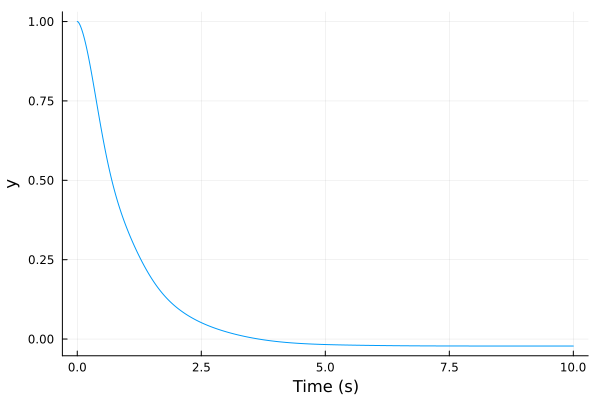

In [58]:
p2φ = pβ_cmp_lat_dyn_cl[3, 1] |> tf
@show zpk(p2φ)

#output error transfer function for a unit feedback closed loop
err_p2φ = 1/(1+p2φ)

#ensure there are no unstable poles in the closed loop system so we can apply the final value theorem
@show poles(err_p2φ) 

#steady state error of the closed loop system for a unit step input
@show err_p2φ(0)
step(err_p2φ, 10) |> plot

If the open loop response from input $p_{cmd}$ to output $\phi$ contained a pure integrator, this would be a type 1
system, and therefore we would get exactly zero steady state error. However, the plant is not a pure kinematic system,
and due to the system's dynamics, instead of a pure integrator we have a very slow unstable pole in the open loop
transfer function. While the unity feedback stabilizes the system, it does not achieve zero steady state error. For
this, we would need integral action in the compensator. In practice, the steady state error achievable with pure
proportional action while keeping reasonable phase margins is acceptable.

poles(err_c_p2φ) = ComplexF64[-49.999999999999815 + 0.0im, -24.47479120778701 + 6.728815530730997im, -24.47479120778701 - 6.728815530730997im, -17.962843377828648 + 0.0im, -2.5741203767716008 + 6.884204628419507im, -2.5741203767716008 - 6.884204628419507im, -0.9073937462641297 + 2.303367215091971im, -0.9073937462641297 - 2.303367215091971im, -3.304908634552489 + 0.0im, -1.88430325658742 + 0.0im, -1.2768427301007181 + 0.0im]
(tf(err_c_p2φ))(0) = [0.0;;]


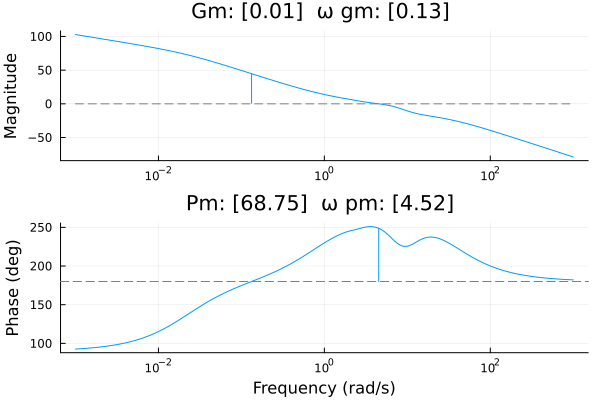

In [285]:
#define a PID compensator
k_p = 4
k_i = 3 #0
k_d = 0.35 #0
τ_d = 0.05
φ_cmp = (k_p + k_i * tf(1, [1,0]) + k_d * tf([1, 0], [τ_d, 1])) |> ss
    
c_p2φ = series(φ_cmp, p2φ)
err_c_p2φ = 1/(1+c_p2φ)

#check that the error transfer function for the unit feedback closed loop system is stable
@show poles(err_c_p2φ);
@show tf(err_c_p2φ)(0)

# setPlotScale("dB")
marginplot(c_p2φ)
# nyquistplot(c_a2p)

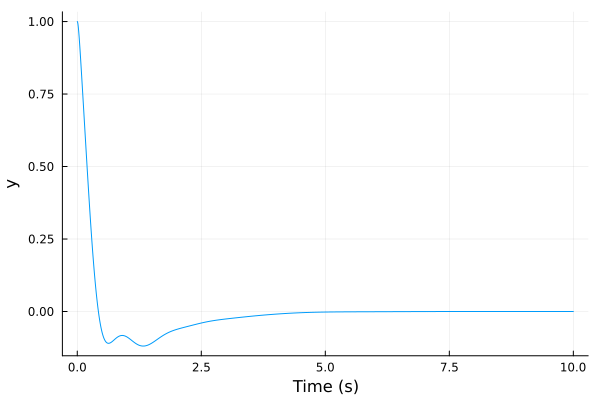

In [284]:
step(err_c_p2φ, 10) |> plot